##Importing  required libraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Reading the csv file into a pandas for easier analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/faruk adam project/adult_data.csv'
adult = pd.read_csv(file_path)
adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [7]:
adult.replace(' ?', pd.NA, inplace=True)
adult.dropna(inplace=True)
adult = adult.applymap(lambda x: x.strip() if isinstance(x, str) else x)
adult.reset_index(drop=True, inplace=True)

print("\nDataset Info After Cleaning:")
print(adult.info())

<ipython-input-7-d95efa7863f1>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  adult = adult.applymap(lambda x: x.strip() if isinstance(x, str) else x)



Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


# 1: How many of each race are represented?


Race Count:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


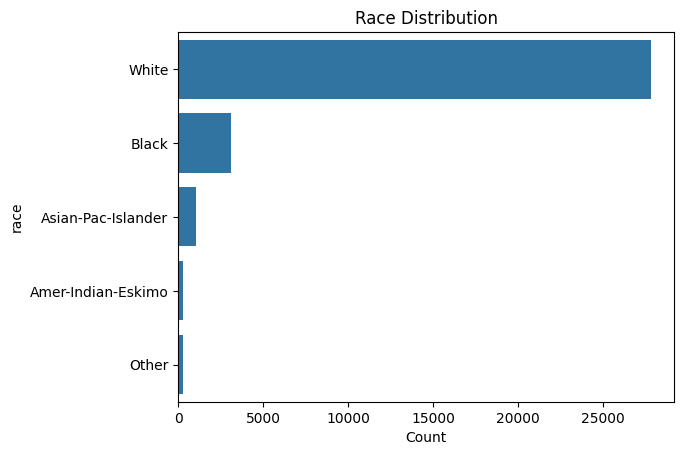

In [11]:
race_count = adult['race'].value_counts()
print("\nRace Count:")
print(race_count)

sns.countplot(y='race', data=adult, order=race_count.index)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.show()

# 2 What is the average age of men?

In [12]:
average_age_men = adult[adult['sex'] == 'Male']['age'].mean()
print(f"\nAverage age of men: {average_age_men:.2f}")


Average age of men: 39.43


# 3 What is the percentage of people who have a Bachelor's degree?


In [14]:
percentage_bachelors = (adult['education'] == 'Bachelors').mean() * 100
print(f"\nPercentage with Bachelor's degree: {percentage_bachelors:.2f}%")


Percentage with Bachelor's degree: 16.45%


# 4 What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?


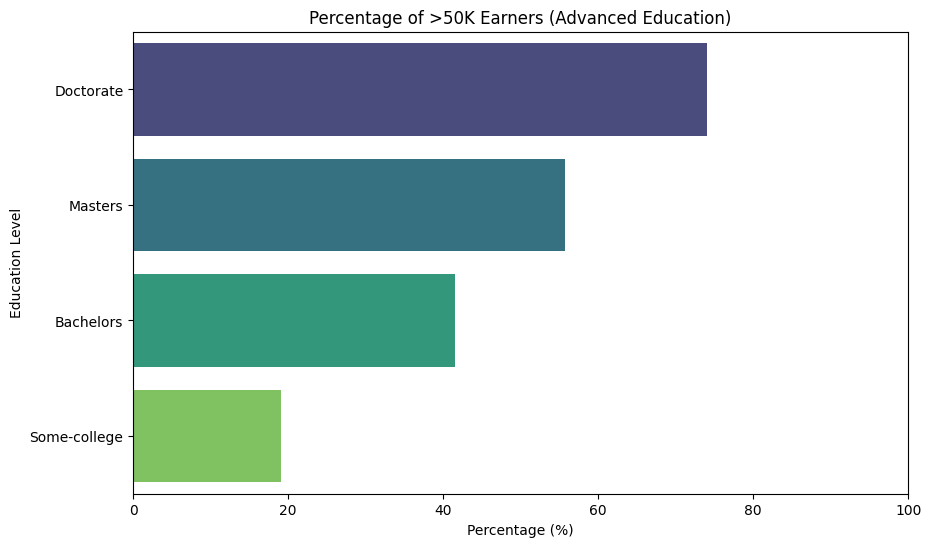

In [22]:
# Define advanced education levels
advanced_edu = ['Bachelors', 'Masters', 'Doctorate', 'Some-college']
adv = adult[adult['education'].isin(advanced_edu)]

# Group and calculate percentage of >50K earners per education level
adv_group = adv.groupby('education')['salary'].value_counts(normalize=True).unstack().fillna(0)
adv_gt_50k_percent = (adv_group['>50K'] * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=adv_gt_50k_percent.values, y=adv_gt_50k_percent.index, palette="viridis", hue=adv_gt_50k_percent.index, legend=False)
plt.title('Percentage of >50K Earners (Advanced Education)')
plt.xlabel('Percentage (%)')
plt.ylabel('Education Level')
plt.xlim(0, 100)
plt.show()

# 5 What percentage of people without advanced education make more than 50K?


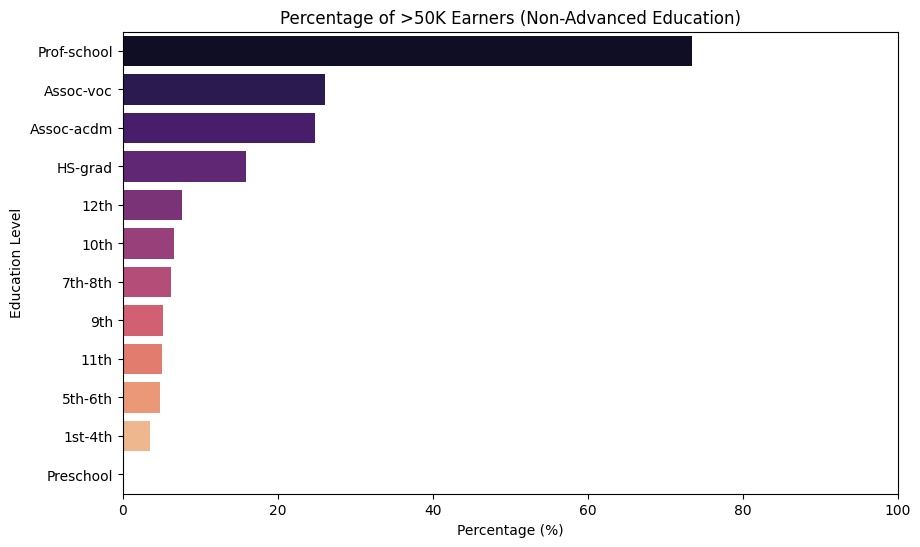

In [23]:
# Define non-advanced education levels
non_advanced_edu = [edu for edu in adult['education'].unique() if edu not in advanced_edu]
non_adv = adult[adult['education'].isin(non_advanced_edu)]

# Group and calculate percentage of >50K earners per education level
nonadv_group = non_adv.groupby('education')['salary'].value_counts(normalize=True).unstack().fillna(0)
nonadv_gt_50k_percent = (nonadv_group['>50K'] * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nonadv_gt_50k_percent.values, y=nonadv_gt_50k_percent.index, palette="magma", hue=nonadv_gt_50k_percent.index, legend=False)
plt.title('Percentage of >50K Earners (Non-Advanced Education)')
plt.xlabel('Percentage (%)')
plt.ylabel('Education Level')
plt.xlim(0, 100)
plt.show()

# 6 What is the minimum number of hours a person works per week?

In [24]:
min_work_hours = adult['hours-per-week'].min()
print(f"\nMinimum hours worked per week: {min_work_hours}")


Minimum hours worked per week: 1


# 7 What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?


In [26]:
min_workers = adult[adult['hours-per-week'] == min_work_hours]
rich_percentage = (min_workers['salary'] == '>50K').mean() * 100
print(f"Percentage of people who work {min_work_hours} hours/week and earns >50k: {rich_percentage:.2f}%")

Percentage of people who work 1 hours/week and earns >50k: 10.00%


#9 Identify the most popular occupation for those who earn >50K in India.

In [34]:
# Filter only those earning >50K
rich_people = adult[adult['salary'] == '>50K']

# Count occupation frequency
top_occupation = rich_people['occupation'].value_counts().idxmax()
top_occupation_count = rich_people['occupation'].value_counts().max()

print(f"The most popular occupation among those who earn >50K is: {top_occupation} ({top_occupation_count} people)")

The most popular occupation among those who earn >50K is: Exec-managerial (1968 people)


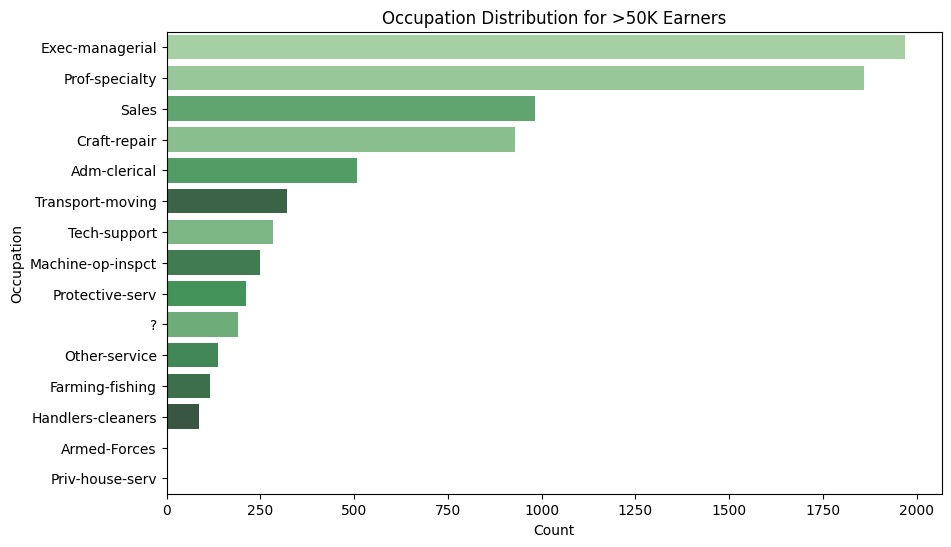

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rich_people, y='occupation', order=rich_people['occupation'].value_counts().index, palette="Greens_d", hue='occupation', legend=False)
plt.title("Occupation Distribution for >50K Earners")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()